### Simple ANN Fashion MNIST

## Important Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
from torchinfo import summary

# Set random seeds for reproducibility
torch.manual_seed(42)

In [13]:
df=pd.read_csv('fmnist_small.csv')
df.shape

(6000, 785)

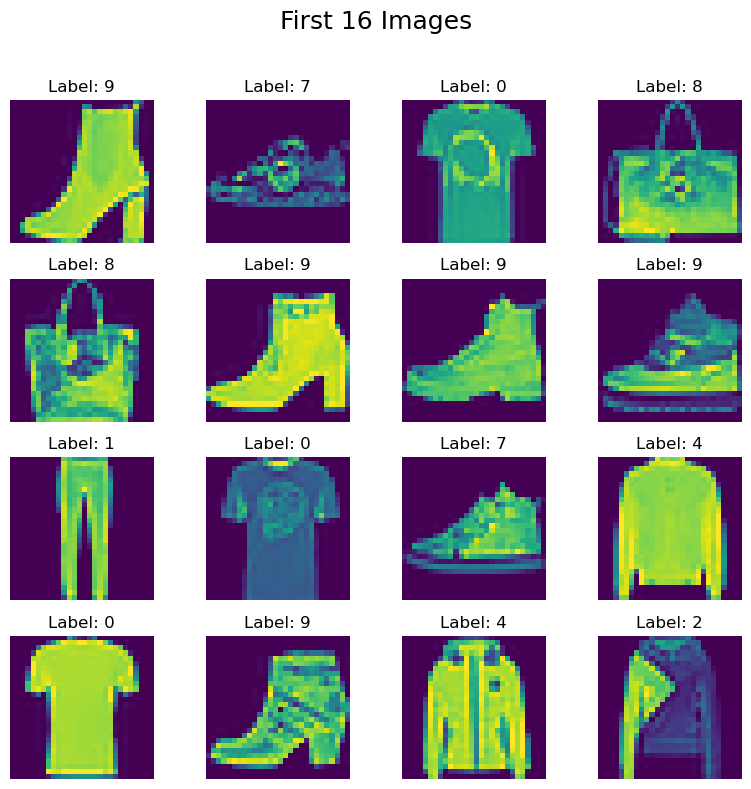

In [28]:
# Create a 4*4 grid of images
fig,axes=plt.subplots(4,4,figsize=(8,8))
fig.suptitle("First 16 Images", fontsize=18)

# plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## Data Preprocessing.

In [76]:
# Data extract. 
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

# Data Split.
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

# Scaling in a range.
X_train=X_train/255.0
X_test=X_test/255.0

## Create Dataset and DataLoader.

In [79]:
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self,idx):
        return self.features[idx], self.labels[idx]

train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

# Data Loader

train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

## Create Model Class.

In [82]:
class Mnist(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(num_features,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,10),
        )
    # Forward Pass
    def forward(self,features):
        out=self.network(features)
        return out

## Important Parameters.

In [85]:
epochs=200
learning_rate=0.001

## Create Model Object, Optimizer, Loss Function.

In [88]:
model=Mnist(X_train.shape[1])

# Loss function
criterion =nn.CrossEntropyLoss()

# Optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

## Training Loop.

In [91]:
for epoch in range(epochs):
    total_epoch_loss=0
    for batch_features,batch_labels in train_loader:

        # Forward Pass
        y_pred=model(batch_features)
        
        # Loss Calculate
        loss=criterion(y_pred,batch_labels)

        # back Pass
        optimizer.zero_grad()
        loss.backward()
        
        # update Weight and bias
        optimizer.step()
        
        total_epoch_loss=total_epoch_loss + loss.item()
    
    avg_loss=total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch + 1}, Loss: {avg_loss}")

Epoch: 1, Loss: 2.3063270092010497
Epoch: 2, Loss: 2.3056466372807822
Epoch: 3, Loss: 2.304975773493449
Epoch: 4, Loss: 2.30430521329244
Epoch: 5, Loss: 2.303627066612244
Epoch: 6, Loss: 2.3029236523310344
Epoch: 7, Loss: 2.302220713297526
Epoch: 8, Loss: 2.3015410312016806
Epoch: 9, Loss: 2.3008824237187704
Epoch: 10, Loss: 2.3002368847529095
Epoch: 11, Loss: 2.2995992930730185
Epoch: 12, Loss: 2.2989551067352294
Epoch: 13, Loss: 2.2983026043574015
Epoch: 14, Loss: 2.2976372909545897
Epoch: 15, Loss: 2.2969575452804567
Epoch: 16, Loss: 2.296259075800578
Epoch: 17, Loss: 2.2955368455251057
Epoch: 18, Loss: 2.2947870922088622
Epoch: 19, Loss: 2.294011739095052
Epoch: 20, Loss: 2.2932052612304688
Epoch: 21, Loss: 2.292365115483602
Epoch: 22, Loss: 2.291483499209086
Epoch: 23, Loss: 2.2905569489796958
Epoch: 24, Loss: 2.2895804834365845
Epoch: 25, Loss: 2.288548304239909
Epoch: 26, Loss: 2.287457164128621
Epoch: 27, Loss: 2.286299885114034
Epoch: 28, Loss: 2.285065690676371
Epoch: 29, Los

## Evaluation

In [93]:
# set model to eval mode
model.eval()

Mnist(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [94]:
total=0
correct=0

with torch.no_grad():
      for batch_features, batch_labels in test_loader:
          outputs = model(batch_features)
          _, predicted = torch.max(outputs, 1)
          total = total + batch_labels.shape[0]
          correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.7233333333333334


In [101]:
print(summary(model, input_size=(X_train.shape[0], X_train.shape[1])))

Layer (type:depth-idx)                   Output Shape              Param #
Mnist                                    [4800, 10]                --
├─Sequential: 1-1                        [4800, 10]                --
│    └─Linear: 2-1                       [4800, 256]               200,960
│    └─ReLU: 2-2                         [4800, 256]               --
│    └─Linear: 2-3                       [4800, 128]               32,896
│    └─ReLU: 2-4                         [4800, 128]               --
│    └─Linear: 2-5                       [4800, 64]                8,256
│    └─ReLU: 2-6                         [4800, 64]                --
│    └─Linear: 2-7                       [4800, 32]                2,080
│    └─ReLU: 2-8                         [4800, 32]                --
│    └─Linear: 2-9                       [4800, 10]                330
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 1.17
Input size (MB): 15.05
Forw